<h4> Análise de Dados com Python <br> <b> Aula 4 <b> </h4> 

<b><h5> Data Mining </h5></b>

In [2]:
#Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Abrindo o arquivo
df = pd.read_csv('carros.csv')

In [3]:
#Visualizando o dataframe
df.head()

,riskiness,losses,make,fuel type,city mpg,highway mpg,aspiration,doors,body,drive,...,engine type,cylinders,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,price
0,2,164.0,audi,gas,24.0,30.0,std,four,sedan,fwd,...,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,13950
1,2,164.0,audi,gas,18.0,22.0,std,four,sedan,4wd,...,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,17450
2,1,158.0,audi,gas,19.0,25.0,std,four,sedan,fwd,...,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,17710
3,1,158.0,audi,gas,17.0,20.0,turbo,four,sedan,fwd,...,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,23875
4,2,192.0,bmw,gas,23.0,29.0,std,two,sedan,rwd,...,ohc,four,108,mpfi,3.50,2.8,8.8,101,5800,16430


# Conhecendo os Dados

Abaixo, descrevemos as informações contidas no dataset **Carros**.

### Informações contidas no dataset
As variáveis contidas e seus significados estão abaixo:

- riskiness: Classificação do risco associado à subscrição de uma nova apólice e o prêmio que deve ser cobrado pela cobertura
- losses: Taxa de desvalorização
- make: Fabricante
- fuel type: tipo de combustível
- aspiration: motores aspirados ou turbinados
- doors: quantidade de portas
- body: tipo de carro (sedan, hatch...)
- drive: Tração
- engine location: localização do motor
- wheel base: distância entre os eixos das rodas dianteiras e traseiras
- length: comprimento
- width: largura
- height: altura
- weight: peso
- engine type: tipo de motor
- cylinders: quantidade de cilindros
- engine size: tamanho do motor
- fuel system: Injeção de combustível
- bore: diâmetro do cilindro
- stroke: tempo do motor (ciclo)
- compression ratio: Taxa de compressão (É um valor numérico adimensional representando a proporção entre o volume aspirado somado ao volume da câmara de combustão em relação ao volume da câmara de combustão)
- horsepower: cavalos de potência
- peak rpm: pico velocidade de rotação do motor
- city mpg: eficiência do combustível na cidade (milhas por galão)
- highway mpg: eficiência do combustível na estrada (milhas por galão)
- price: preço

In [6]:
#Describe das variáveis numéricas.
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
riskiness,165.0,0.739394,1.183716,-2.00,0.00,1.00,2.00,3.00
losses,159.0,122.566038,36.905889,65.00,94.00,115.00,151.50,256.00
city mpg,164.0,26.408537,6.234491,15.00,22.75,26.00,31.00,49.00
highway mpg,159.0,32.088050,6.723644,18.00,28.00,32.00,37.00,54.00
wheel base,165.0,98.321212,5.183802,86.60,94.50,97.00,101.20,115.60
length,165.0,172.453333,11.699643,141.10,165.70,172.40,177.80,202.60
width,165.0,65.590909,2.011819,60.30,64.00,65.40,66.50,71.70
height,165.0,53.916970,2.233821,49.40,52.50,54.10,55.50,59.80
weight,165.0,2461.575758,482.616638,1488.00,2081.00,2370.00,2808.00,4066.00
engine size,165.0,119.351515,30.682244,61.00,97.00,110.00,136.00,258.00


In [39]:
#Describe das variáveis categóricas.
#df.describe(include='O').T
#df['body'].unique()
#df[df['make']=='mercedes-benz']#['price'].mean()
#df[df.price>35000]
df[(df['fuel type']=='diesel') & (df.riskiness==3)]['losses'].mean()

nan

In [41]:
#Verificando os tipos das variáveis e se possuem valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 164
Data columns (total 26 columns):
riskiness            152 non-null int64
losses               152 non-null float64
make                 152 non-null object
fuel type            152 non-null object
city mpg             152 non-null float64
highway mpg          152 non-null float64
aspiration           152 non-null object
doors                152 non-null object
body                 152 non-null object
drive                152 non-null object
engine location      152 non-null object
wheel base           152 non-null float64
length               152 non-null float64
width                152 non-null float64
height               152 non-null float64
weight               152 non-null int64
engine type          152 non-null object
cylinders            152 non-null object
engine size          152 non-null int64
fuel system          152 non-null object
bore                 152 non-null float64
stroke               152 non-

In [31]:
#Visualizando se o dataframe possui dados faltantes.
df.isnull().sum()

riskiness            0
losses               6
make                 0
fuel type            0
city mpg             1
highway mpg          6
aspiration           0
doors                0
body                 0
drive                0
engine location      0
wheel base           0
length               0
width                0
height               0
weight               0
engine type          0
cylinders            0
engine size          0
fuel system          0
bore                 0
stroke               0
compression ratio    0
horsepower           0
peak rpm             0
price                0
dtype: int64

In [43]:
#Ou desta forma (relembrando)
df.isna().sum()

riskiness            0
losses               6
make                 0
fuel type            0
city mpg             1
highway mpg          6
aspiration           0
doors                0
body                 0
drive                0
engine location      0
wheel base           0
length               0
width                0
height               0
weight               0
engine type          0
cylinders            0
engine size          0
fuel system          0
bore                 0
stroke               0
compression ratio    0
horsepower           0
peak rpm             0
price                0
dtype: int64

In [40]:
#Exclusão das linhas com dados faltantes (após análise do impacto no estudo)
df.dropna(subset=['losses','highway mpg', 'city mpg'], inplace=True)
df.isna().sum()

riskiness            0
losses               0
make                 0
fuel type            0
city mpg             0
highway mpg          0
aspiration           0
doors                0
body                 0
drive                0
engine location      0
wheel base           0
length               0
width                0
height               0
weight               0
engine type          0
cylinders            0
engine size          0
fuel system          0
bore                 0
stroke               0
compression ratio    0
horsepower           0
peak rpm             0
price                0
dtype: int64

In [75]:
#Caso seja necessário podemos substituí-los por outros dados.
df.losses.fillna(0,inplace=True) #Substituidos por 0
df['city mpg'].fillna(-999, inplace=True) #Substituidos por 0
df['highway mpg'].fillna(df['highway mpg'].median(), inplace=True) #Substituidos pela mediana.

df.isna().sum()

riskiness            0
losses               0
make                 0
fuel type            0
city mpg             0
highway mpg          0
aspiration           0
doors                0
body                 0
drive                0
engine location      0
wheel base           0
length               0
width                0
height               0
weight               0
engine type          0
cylinders            0
engine size          0
fuel system          0
bore                 0
stroke               0
compression ratio    0
horsepower           0
peak rpm             0
price                0
dtype: int64

In [59]:
#lista_nulos = df[pd.isnull(df['highway mpg'])].index
df.iloc[lista_nulos]

,riskiness,losses,make,fuel type,city mpg,highway mpg,aspiration,doors,body,drive,...,engine type,cylinders,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,price
96,2,104.0,saab,gas,19.0,32.0,turbo,four,sedan,fwd,...,dohc,four,121,mpfi,3.54,3.07,9.0,160,5500,18620
98,2,83.0,subaru,gas,26.0,32.0,std,two,hatchback,fwd,...,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400,7053
104,0,102.0,subaru,gas,24.0,32.0,turbo,four,sedan,4wd,...,ohcf,four,108,mpfi,3.62,2.64,7.7,111,4800,11259
107,0,85.0,subaru,gas,23.0,32.0,std,four,wagon,4wd,...,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,8013
115,0,91.0,toyota,gas,30.0,32.0,std,four,sedan,fwd,...,ohc,four,98,2bbl,3.19,3.03,9.0,70,4800,6938
123,1,168.0,toyota,gas,29.0,32.0,std,two,hatchback,rwd,...,ohc,four,98,2bbl,3.19,3.03,9.0,70,4800,8238


In [60]:
len(df)

165

In [68]:
#Verificando duplicidade de dados
df[df.duplicated()]

,riskiness,losses,make,fuel type,city mpg,highway mpg,aspiration,doors,body,drive,...,engine type,cylinders,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,price


In [67]:
#Excluindo os dados duplicados.
df.drop_duplicates(inplace=True)


In [38]:
len(df)

147

----------------------------
<h2> Atividade 1</h2>
<i> Hora de Praticar </i>

--------------

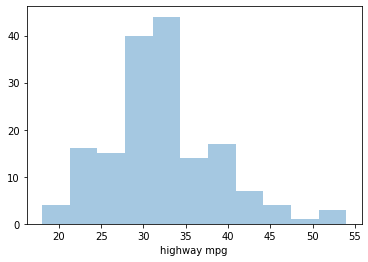

In [76]:
#Verificando a distribuição dos dados numéricos.
sns.distplot(df["highway mpg"], kde=False)
#Curva normal ou curva de Gauss

<h5> Distribuição da Variável Highway mpg </h5>

A distribuição da variável highway mpg se estende desde ~17 até ~54 com o pico em torno de 32. (Condizente coma  média de 32 obtida anteriormente.)

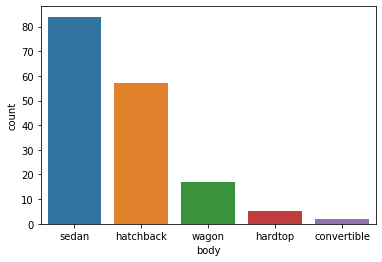

In [78]:
#Verificando a distribuição dos dados categóricos.
sns.countplot(df.body)

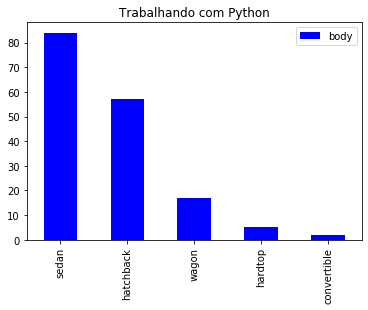

In [104]:
df_plot = pd.DataFrame(df.body.value_counts())
#df_plot.index=['Corpo']
df_plot.plot(kind='bar', title='Trabalhando com Python', color=['blue','green','red','yellow','black'])

<h5> Distribuição da Variável Body </h5>

Nota-se que a maior parte dos veículos são do tipo sedan e hatchback, com uma proporção pequena de veículos conversíveis. 

----------------------------
<h2> Atividade 2</h2>
<i> Hora de Praticar </i>

-------------

In [44]:
#Calculando a média do conjunto
df["highway mpg"].mean()

31.918367346938776

In [105]:
df["horsepower"].mean()

96.18181818181819

In [106]:
#Calculando a mediana
df["highway mpg"].median()

32.0

In [107]:
df["horsepower"].median()

90.0

In [108]:
#Calculando desvio padrão
df["horsepower"].std()

30.706373519561655

In [52]:
df["wheel base"].std()

5.233602888888646

In [109]:
#Calculando a moda
df["doors"].mode()

0    four
dtype: object

In [115]:
df["body"].mode()

0    sedan
dtype: object

In [116]:
df["stroke"].mode()

0    3.03
dtype: float64

In [56]:
df["highway mpg"].describe()

count    147.000000
mean      31.918367
std        6.498166
min       18.000000
25%       28.000000
50%       32.000000
75%       37.000000
max       54.000000
Name: highway mpg, dtype: float64

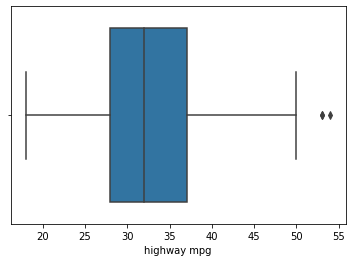

In [119]:
#Criando um boxplot para análise dos dados.
sns.boxplot(df["highway mpg"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2942a59ce48>,
 'caps': [<matplotlib.lines.Line2D at 0x2942a5a8550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2942a59cac8>],
 'medians': [<matplotlib.lines.Line2D at 0x2942a5a8be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2942a5a8f28>],
 'means': []}

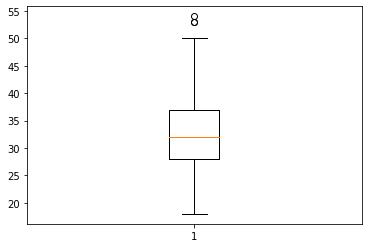

In [118]:
plt.boxplot(df["highway mpg"])

In [136]:
df[df["highway mpg"]>50].iloc[1]
#df[df.make=='honda']
#df.make.value_counts()

riskiness                    2
losses                     137
make                     honda
fuel type                  gas
city mpg                    49
highway mpg                 54
aspiration                 std
doors                      two
body                 hatchback
drive                      fwd
engine location          front
wheel base                86.6
length                   144.6
width                     63.9
height                    50.8
weight                    1713
engine type                ohc
cylinders                 four
engine size                 92
fuel system               1bbl
bore                      2.91
stroke                    3.41
compression ratio          9.6
horsepower                  58
peak rpm                  4800
price                     6479
Name: 19, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x2942958a908>,
 'caps': [<matplotlib.lines.Line2D at 0x2942a6806d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2942a670c18>],
 'medians': [<matplotlib.lines.Line2D at 0x2942a680d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2942a680e10>],
 'means': []}

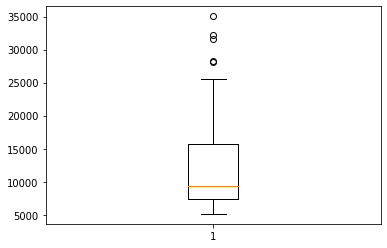

In [128]:
plt.boxplot(df["price"])

In [150]:
sns.boxplot(df["price"])

In [171]:
df['price'].median()

9279.0

[Text(0, 0, 'audi'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'mercedes-benz'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'peugot'),
 Text(0, 0, 'plymouth'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'volvo')]

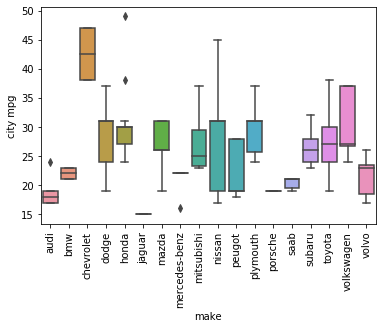

In [169]:
df_2 = df[df['city mpg']>=0]
g = sns.boxplot(x='make', y='city mpg', data=df_2)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

[Text(0, 0, 'audi'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'mercedes-benz'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'peugot'),
 Text(0, 0, 'plymouth'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'volvo')]

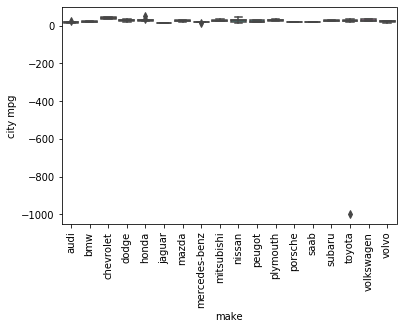

In [165]:
g = sns.boxplot(x='make', y='city mpg', data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

[Text(0, 0, 'audi'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'mercedes-benz'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'peugot'),
 Text(0, 0, 'plymouth'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'volvo')]

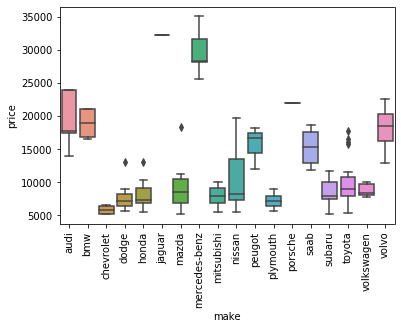

In [175]:
g = sns.boxplot(x='make', y='price', data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
#1 - Tirar conclusões a partir desse gráfico
#A Mercedez-Benz se sobresai em relação ao preço

[Text(0, 0, 'audi'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'peugot'),
 Text(0, 0, 'plymouth'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'volvo')]

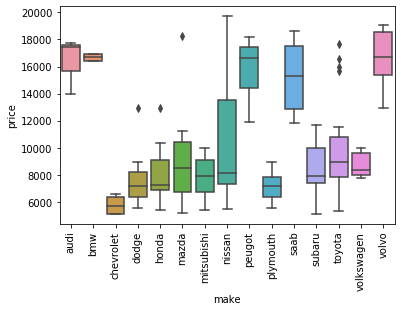

In [178]:
#2 - Criar gráfico com menos de 15 mil e tentar tirar conclusões
#Chevrolet tem preço abaixo
#Peugeto, Saab, Volto e Audi tem preços intermediários
df_2 = df[df.price<=20000]
g = sns.boxplot(x='make', y='price', data=df_2)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

[Text(0, 0, 'audi'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'mercedes-benz'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'peugot'),
 Text(0, 0, 'plymouth'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'volvo')]

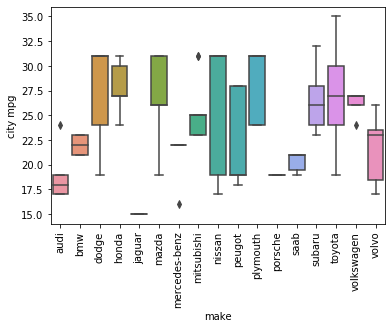

In [181]:
#Criar gráfico co city mpg. Caso haja algum problema, resolver e tirar conclusões
#Chevrolet tem city mpg maior do que os outros
#Audi tem valor bem abaixo dos outros
df_3 = df[(df['city mpg']>=0) & (df['city mpg']<=35)]
g = sns.boxplot(x='make', y='city mpg', data=df_3)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [189]:
df_audi = df_3[df_3.make=='audi']
#sns.boxplot(df_audi["city mpg"])

In [4]:
df_chev = df[df.make=='chevrolet']

In [195]:
df_chev.corr()

,riskiness,losses,city mpg,highway mpg,wheel base,length,width,height,weight,engine size,bore,stroke,compression ratio,horsepower,peak rpm,price
riskiness,1.000000,0.997117,0.904534,0.904534,-0.904534,-0.950802,-0.904534,0.904534,-0.928942,-0.904534,-0.904534,-0.904534,-0.904534,-0.904534,-0.904534,-0.958951
losses,0.997117,1.000000,0.934282,0.934282,-0.934282,-0.971569,-0.934282,0.934282,-0.954357,-0.934282,-0.934282,-0.934282,-0.934282,-0.934282,-0.934282,-0.977704
city mpg,0.904534,0.934282,1.000000,1.000000,-1.000000,-0.992132,-1.000000,1.000000,-0.998124,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.988319
highway mpg,0.904534,0.934282,1.000000,1.000000,-1.000000,-0.992132,-1.000000,1.000000,-0.998124,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.988319
wheel base,-0.904534,-0.934282,-1.000000,-1.000000,1.000000,0.992132,1.000000,-1.000000,0.998124,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988319
length,-0.950802,-0.971569,-0.992132,-0.992132,0.992132,1.000000,0.992132,-0.992132,0.997935,0.992132,0.992132,0.992132,0.992132,0.992132,0.992132,0.999623
width,-0.904534,-0.934282,-1.000000,-1.000000,1.000000,0.992132,1.000000,-1.000000,0.998124,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988319
height,0.904534,0.934282,1.000000,1.000000,-1.000000,-0.992132,-1.000000,1.000000,-0.998124,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.988319
weight,-0.928942,-0.954357,-0.998124,-0.998124,0.998124,0.997935,0.998124,-0.998124,1.000000,0.998124,0.998124,0.998124,0.998124,0.998124,0.998124,0.995795
engine size,-0.904534,-0.934282,-1.000000,-1.000000,1.000000,0.992132,1.000000,-1.000000,0.998124,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988319


----------------------------
<h2> Atividade 3</h2>
<i> Hora de Praticar </i>

----------------------------

In [11]:
#Descobrindo a correlação entre os dados
df.corr(method="pearson")

,riskiness,losses,city mpg,highway mpg,wheel base,length,width,height,weight,engine size,bore,stroke,compression ratio,horsepower,peak rpm,price
riskiness,1.000000,0.493678,0.117129,0.171760,-0.517116,-0.338496,-0.217361,-0.470357,-0.260329,-0.129423,-0.259510,-0.027314,-0.136971,-0.017813,0.208618,-0.169442
losses,0.493678,1.000000,-0.248817,-0.218581,-0.025407,0.061025,0.105595,-0.390055,0.141607,0.228061,-0.024005,0.044186,-0.136143,0.307040,0.210706,0.249173
city mpg,0.117129,-0.248817,1.000000,0.973685,-0.603535,-0.745669,-0.676871,-0.203973,-0.773099,-0.707669,-0.589985,-0.031126,0.245378,-0.835761,-0.033042,-0.699191
highway mpg,0.171760,-0.218581,0.973685,1.000000,-0.636922,-0.748102,-0.710555,-0.226078,-0.796916,-0.719259,-0.581253,-0.036255,0.216466,-0.835358,-0.031516,-0.725526
wheel base,-0.517116,-0.025407,-0.603535,-0.636922,1.000000,0.875936,0.808498,0.556052,0.814856,0.651904,0.576128,0.163196,0.277826,0.534180,-0.267931,0.739407
length,-0.338496,0.061025,-0.745669,-0.748102,0.875936,1.000000,0.840058,0.497333,0.874181,0.723886,0.638550,0.125081,0.172998,0.683071,-0.210838,0.758838
width,-0.217361,0.105595,-0.676871,-0.710555,0.808498,0.840058,1.000000,0.296375,0.863994,0.753585,0.546435,0.212794,0.242759,0.681870,-0.196204,0.813509
height,-0.470357,-0.390055,-0.203973,-0.226078,0.556052,0.497333,0.296375,1.000000,0.370517,0.115985,0.252216,-0.088626,0.228426,0.046491,-0.232671,0.253554
weight,-0.260329,0.141607,-0.773099,-0.796916,0.814856,0.874181,0.863994,0.370517,1.000000,0.885907,0.637803,0.182098,0.216579,0.796367,-0.254092,0.882669
engine size,-0.129423,0.228061,-0.707669,-0.719259,0.651904,0.723886,0.753585,0.115985,0.885907,1.000000,0.586743,0.300697,0.134303,0.812204,-0.304157,0.831279


In [7]:
df[['city mpg','highway mpg']]

,city mpg,highway mpg
0,24.0,30.0
1,18.0,22.0
2,19.0,25.0
3,17.0,20.0
4,23.0,29.0
5,23.0,29.0
6,21.0,28.0
7,21.0,28.0
8,47.0,53.0
9,38.0,43.0


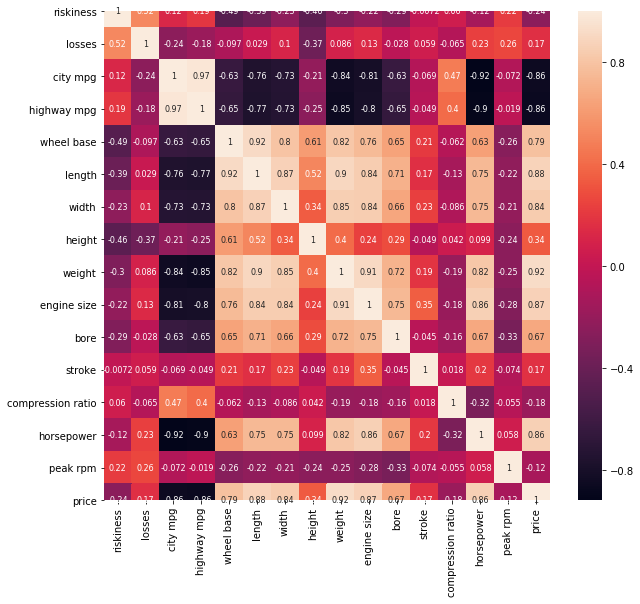

In [78]:
#Matriz de correlação dos dados
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(method='spearman'), annot=True, annot_kws={"size":8})

----------------------------
<h2> Atividade 4</h2>
<i> Hora de Praticar </i>


----------------

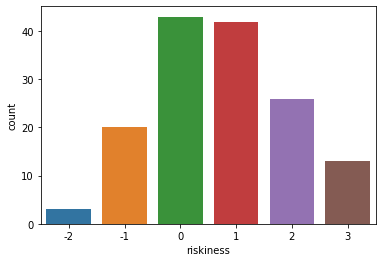

In [68]:
#Estratificando os dados
sns.countplot(df["riskiness"])

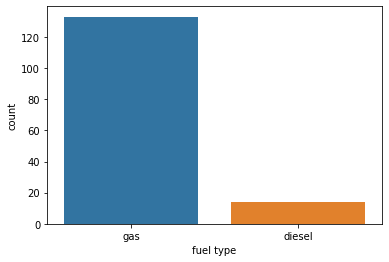

In [70]:
sns.countplot(df["fuel type"])

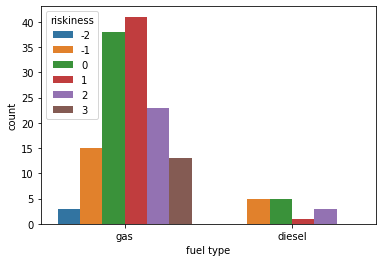

In [69]:
sns.countplot(df["fuel type"], hue=df['riskiness'])

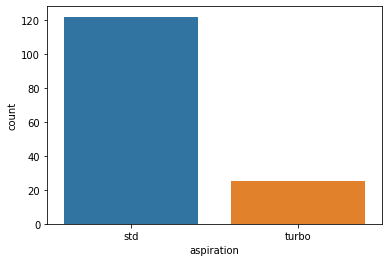

In [71]:
sns.countplot(df["aspiration"])

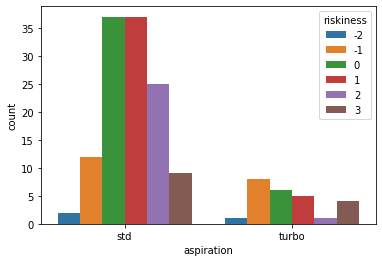

In [72]:
sns.countplot(df["aspiration"], hue=df["riskiness"])

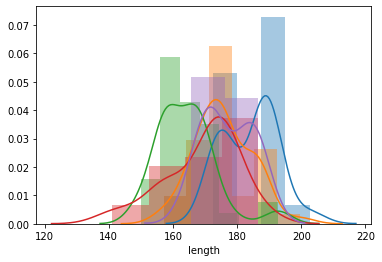

In [75]:
sns.distplot(df[df.riskiness == -1].length,label="-1")
sns.distplot(df[df.riskiness == 0].length,label="0")
sns.distplot(df[df.riskiness == 1].length,label="1")
sns.distplot(df[df.riskiness == 2].length,label="2")
sns.distplot(df[df.riskiness == 3].length,label="3")

----------------------------
<h2> Atividade 5</h2>
<i> Hora de Praticar </i>
